# Automated Blood Cell Image Segmentation Using Classical Image Processing

1. Load images
2. Gaussian blur
3. Thresholding
4. Morphological noise removal
5. Contour detection
6. Cell counting & visualization.

# Import Libraries

In [201]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load Blood Cell Image

In [204]:
def show_images_subplots(images, titles=None, cols=5, cmap='gray', figsize=(15, 10)):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=figsize)
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap=cmap)
        if titles:
            plt.title(titles[i], fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [206]:
dataset_path = r'E:\Dataset\bloodcells_dataset\erythroblast'

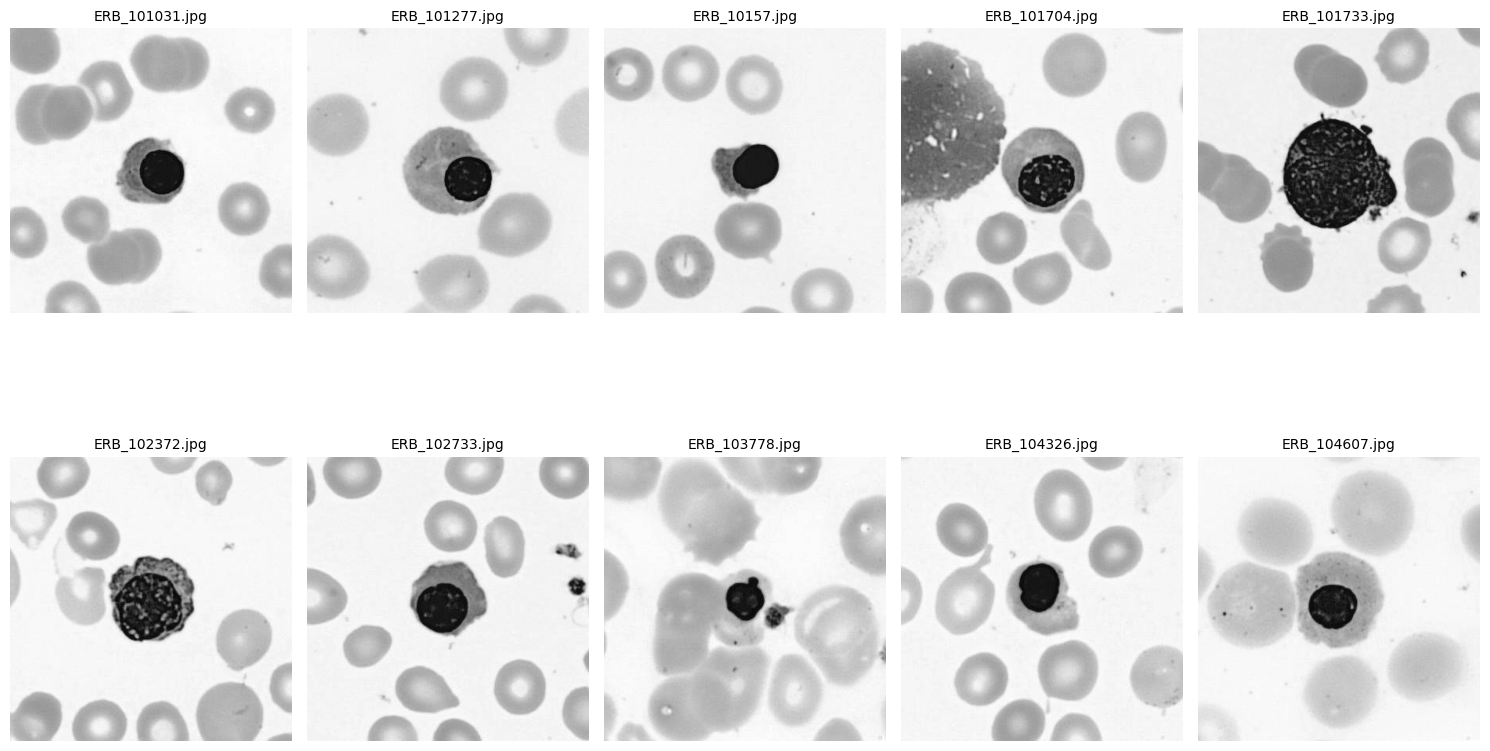

In [208]:
num_images = 10 
image_files = os.listdir(dataset_path)[:num_images]

images = []
image_titles = []

for img_file in image_files:
    img_path = os.path.join(dataset_path, img_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    images.append(img)
    image_titles.append(img_file)

# Show original images
show_images_subplots(images, titles=image_titles, cols=5)

## Gaussian Blur

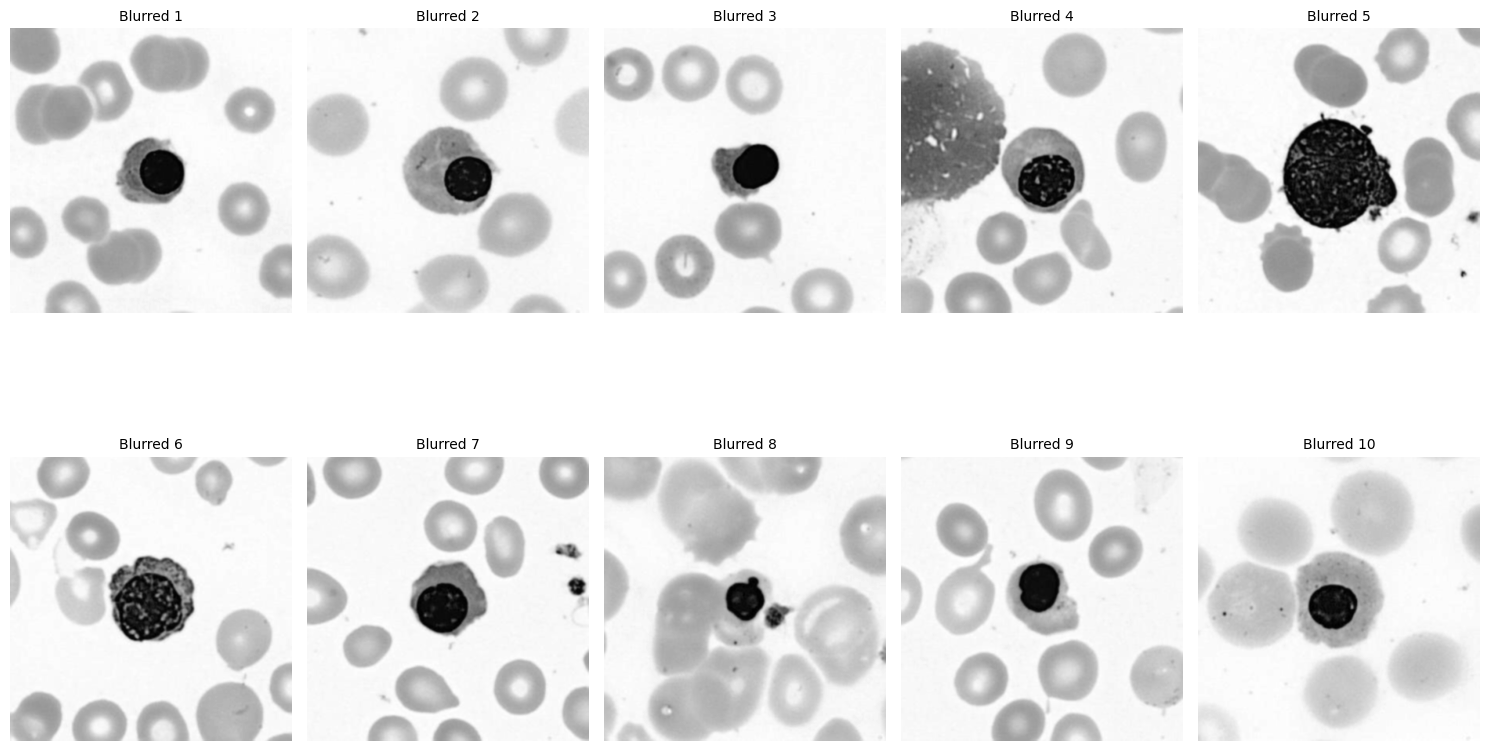

In [210]:
blurred_images = [cv2.GaussianBlur(img, (3, 3), 0) for img in images]
show_images_subplots(blurred_images, titles=[f"Blurred {i+1}" for i in range(len(blurred_images))])

## Binary Threshold

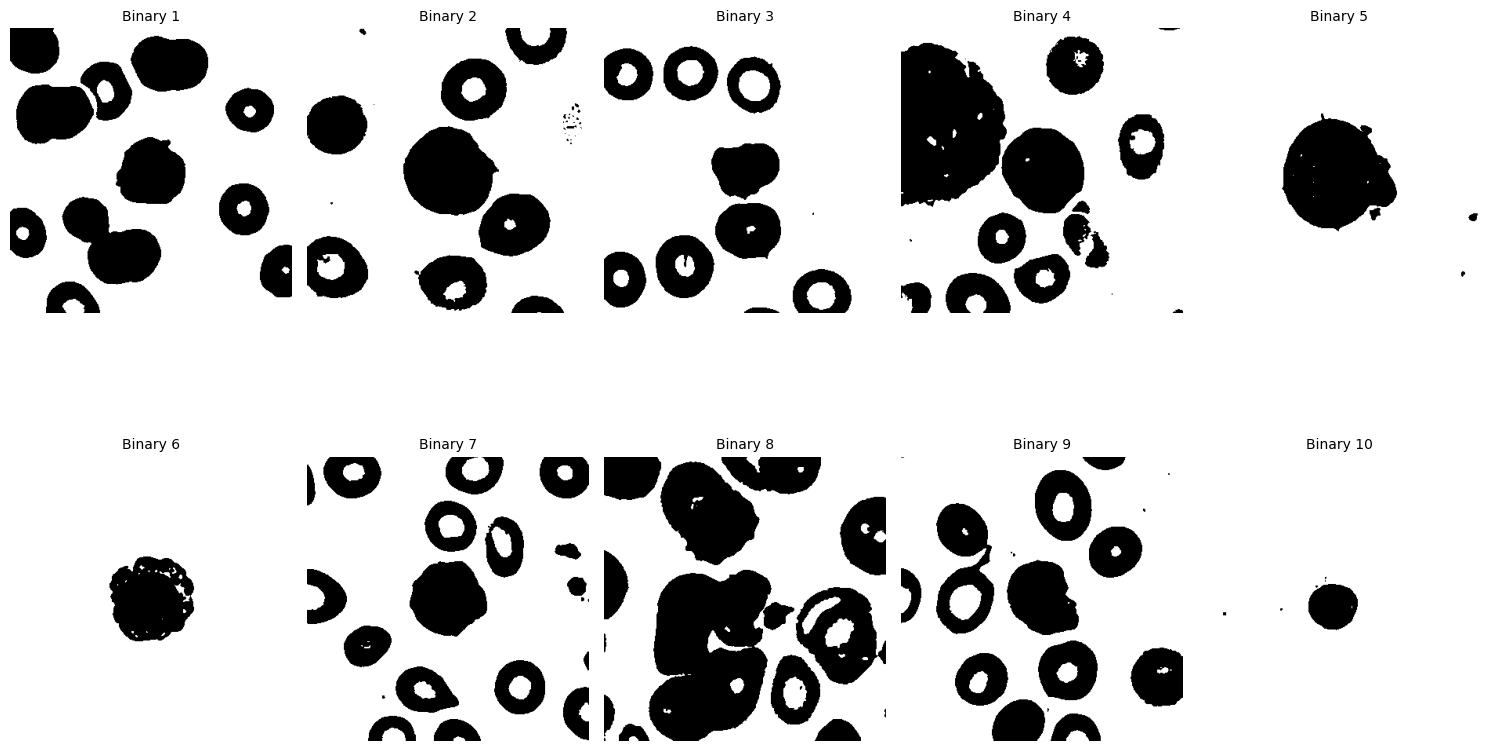

In [212]:
binary_images = [
    cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    for img in blurred_images
]
show_images_subplots(binary_images, titles=[f"Binary {i+1}" for i in range(len(binary_images))])

## Morphological Processing

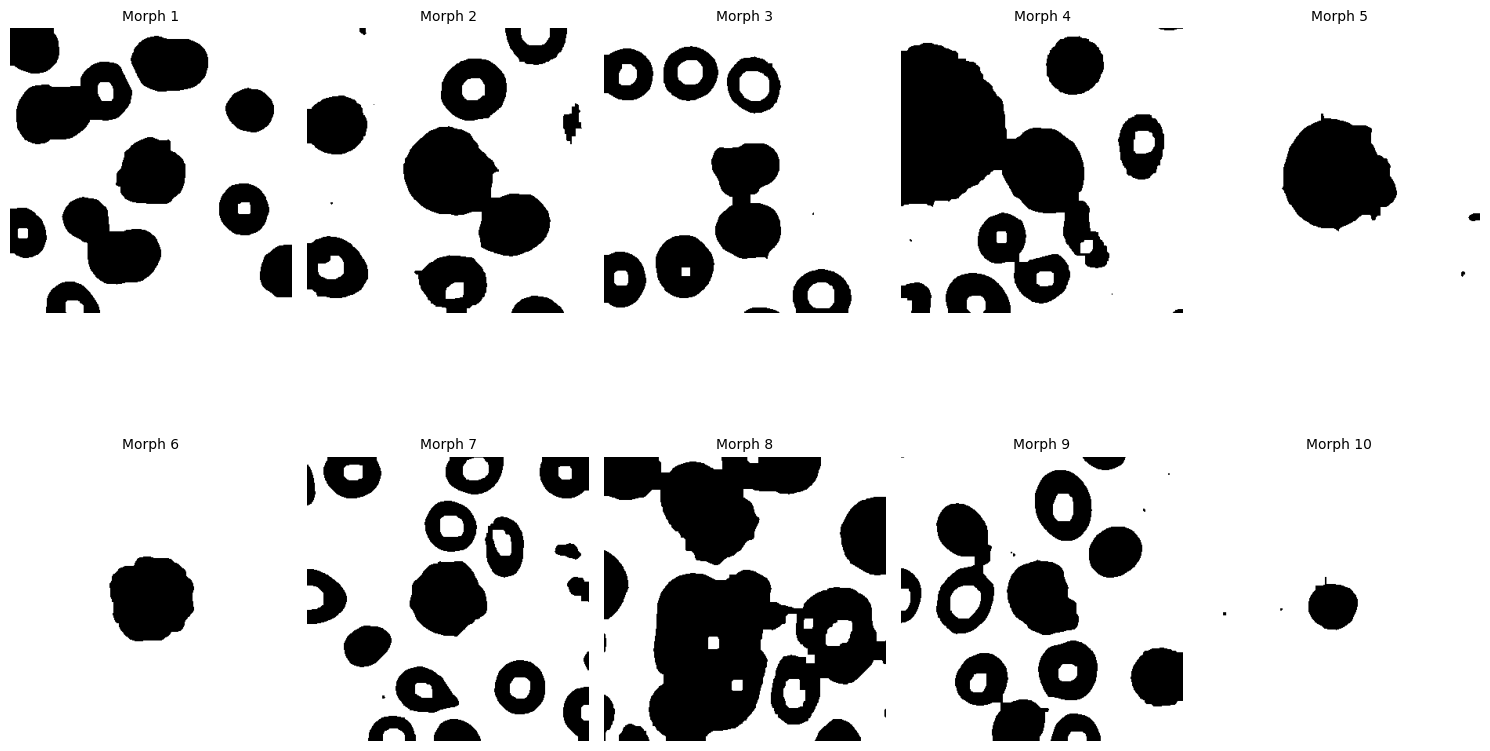

In [214]:
kernel = np.ones((3, 3), np.uint8)
morph_images = [
    cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel, iterations=5)
    for bin_img in binary_images
]
show_images_subplots(morph_images, titles=[f"Morph {i+1}" for i in range(len(morph_images))])

## Detect and Display Contours

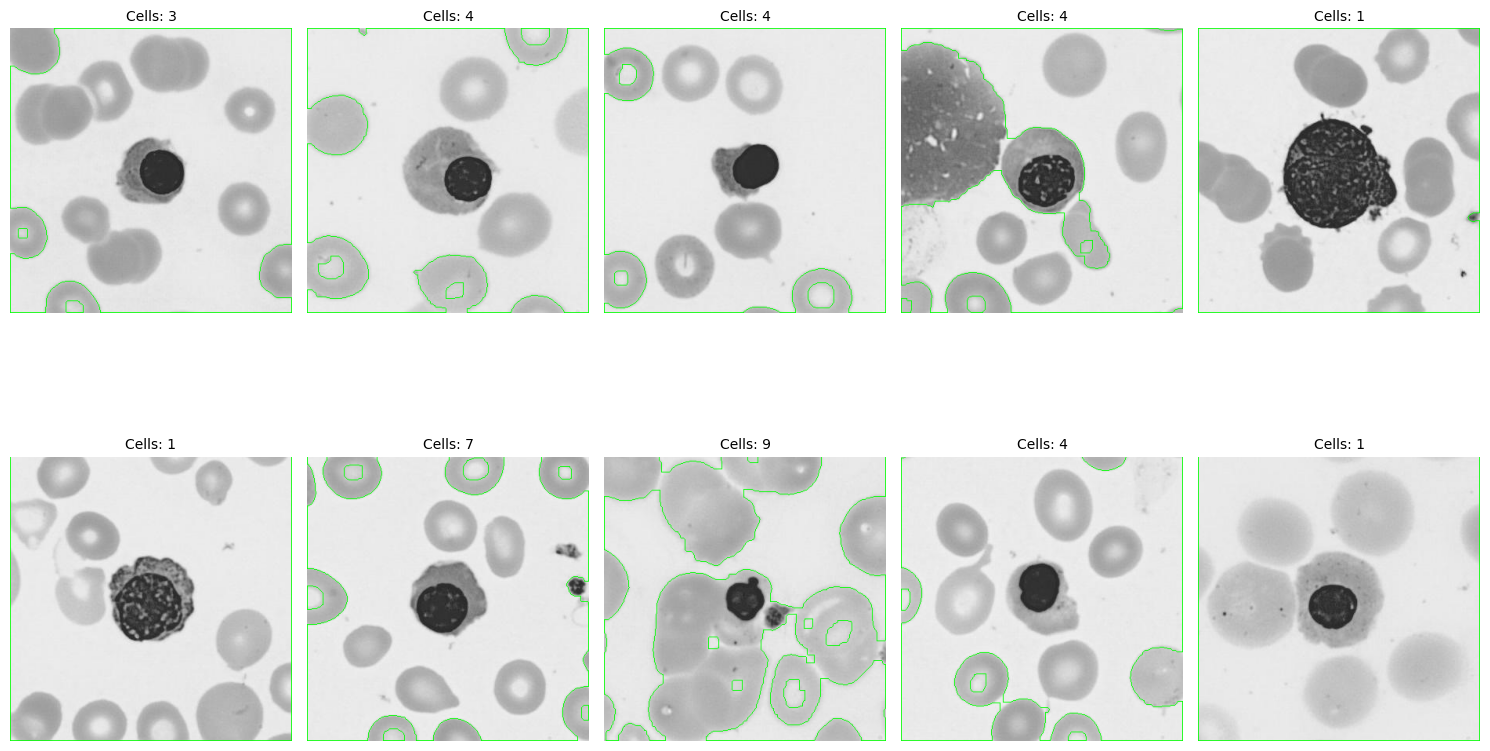

In [216]:
images_with_contours = []
contour_titles = []

for i, (orig_img, proc_img) in enumerate(zip(images, morph_images)):
    color_img = cv2.cvtColor(orig_img, cv2.COLOR_GRAY2BGR)
    contours, _ = cv2.findContours(proc_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(color_img, contours, -1, (0, 255, 0), 1)
    images_with_contours.append(color_img)
    contour_titles.append(f"Cells: {len(contours)}")

show_images_subplots(images_with_contours, titles=contour_titles, cmap=None)

## Output Summary

In [218]:
for i, title in enumerate(contour_titles):
    print(f"Image {i+1}: {title}")

Image 1: Cells: 3
Image 2: Cells: 4
Image 3: Cells: 4
Image 4: Cells: 4
Image 5: Cells: 1
Image 6: Cells: 1
Image 7: Cells: 7
Image 8: Cells: 9
Image 9: Cells: 4
Image 10: Cells: 1
